In [1]:
import pandas as pd
df_bookings = pd.read_csv("/Users/shazia/Downloads/source-code-2/3_project_hospitality_analysis/datasets/fact_bookings.csv")
df_bookings.head(5)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [2]:
# describes the shape of the dataframe
df_bookings.shape


(134590, 12)

In [3]:
# Counts the unique room category 
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [4]:
# counts the unique bookings
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [5]:
# Counts the number of bookings made 
df_bookings.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: xlabel='booking_platform'>

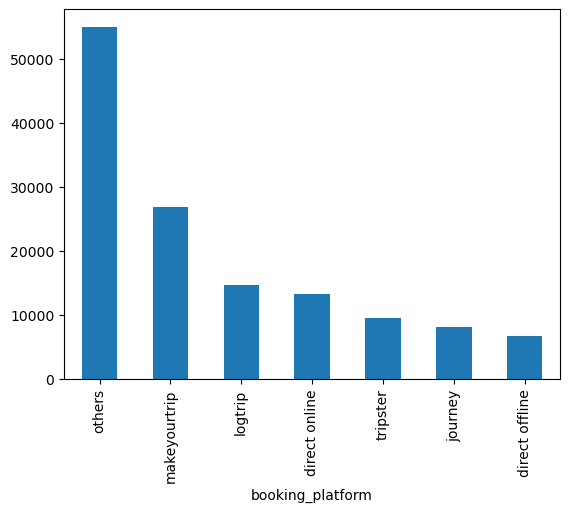

In [6]:
#plot the bar graph of the data 
df_bookings.booking_platform.value_counts().plot(kind = "bar")

In [7]:
# this gives shape of the data frame
df_bookings = df_bookings[df_bookings.no_guests>=0]
df_bookings.shape

(134578, 12)

In [8]:
#Calculate minimum and maximum generated revenue
df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max()

(6500, 28560000)

In [9]:
# Calculating average i.e also called as mean standard deviation
avg_revenue,std_dev_revenue= df_bookings.revenue_generated.mean(),df_bookings.revenue_generated.std()
avg_revenue,std_dev_revenue

(15378.036937686695, 93040.15493143328)

In [10]:
# calculating outlier i.e if a value is 3times plus or minus mean then its outlier

higher_limit = avg_revenue + 3 * std_dev_revenue
higher_limit

294498.50173198653

In [11]:
lower_limit = avg_revenue - 3 * std_dev_revenue
lower_limit

-263742.4278566132

In [12]:
# check if there is any negative revenue generated
df_bookings[df_bookings.revenue_generated<=0]


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [13]:
# check if there is outlier i.e more than the higher limit
df_bookings[df_bookings.revenue_generated>higher_limit]


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [14]:
# removing the outlier from the dataframe
df_bookings = df_bookings[df_bookings.revenue_generated<higher_limit]
df_bookings.shape

(134573, 12)

In [15]:
df_bookings.revenue_realized.describe()


count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [16]:
mean_realized,std_realized = df_bookings.revenue_realized.mean(),df_bookings.revenue_realized.std()
mean_realized,std_realized 

(12695.983585117372, 6927.791692242509)

In [17]:
higher_limit = mean_realized + 3 * std_realized
higher_limit

33479.3586618449

In [18]:
lower_limit  = mean_realized - 3 * std_realized
lower_limit

-8087.391491610155

In [19]:
df_bookings[df_bookings.revenue_realized > higher_limit]


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


In [20]:
df_bookings[df_bookings.room_category=='RT4'].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [21]:
23439.308444+3*9048.599076

50585.105672000005

In [22]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [23]:
df_aggregate = pd.read_csv("/Users/shazia/Downloads/source-code-3/3_project_hospitality_analysis/datasets/fact_aggregated_bookings.csv")

In [24]:
df_aggregate

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0
9196,16559,31-Jul-22,RT4,13,18.0
9197,17558,31-Jul-22,RT4,3,6.0
9198,19563,31-Jul-22,RT4,3,6.0


In [25]:
df_aggregate["occupancy"]= df_aggregate["successful_bookings"]/df_aggregate["capacity"]
df_aggregate["occupancy"] = df_aggregate["occupancy"].apply(lambda x: round (x* 100, 2))

In [26]:
df_aggregate

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
3,17558,1-May-22,RT1,30,19.0,157.89
4,16558,1-May-22,RT1,18,19.0,94.74
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.22
9196,16559,31-Jul-22,RT4,13,18.0,72.22
9197,17558,31-Jul-22,RT4,3,6.0,50.00
9198,19563,31-Jul-22,RT4,3,6.0,50.00


# Insight generation

1. Average occupancy rate

In [27]:
df_aggregate.groupby("room_category")["occupancy"].mean().round(2)                                           

room_category
RT1    58.22
RT2    58.04
RT3    58.03
RT4    59.30
Name: occupancy, dtype: float64

In [28]:
df_rooms = pd.read_csv("/Users/shazia/Downloads/source-code-3/3_project_hospitality_analysis/datasets/dim_rooms.csv")
df_rooms 

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [29]:
df = pd.merge(df_aggregate ,df_rooms, left_on = "room_category",right_on ="room_id")

In [30]:
df

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,RT1,Standard
4,16558,1-May-22,RT1,18,19.0,94.74,RT1,Standard
...,...,...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.22,RT4,Presidential
9196,16559,31-Jul-22,RT4,13,18.0,72.22,RT4,Presidential
9197,17558,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential
9198,19563,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential


In [31]:
df.drop("room_id", axis=1, inplace = True)

In [32]:
df.head(6)

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,Standard
4,16558,1-May-22,RT1,18,19.0,94.74,Standard
5,17560,1-May-22,RT1,28,40.0,70.00,Standard


print average occupancy rate per city

In [33]:
df_hotels = pd.read_csv("/Users/shazia/Downloads/source-code-3/3_project_hospitality_analysis/datasets/dim_hotels.csv")
df_hotels.head(4)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi


In [35]:
df = pd.merge(df_hotels,df,on="property_id")
df.head(8)

,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity,occupancy,room_class
0,16558,Atliq Grands,Luxury,Delhi,1-May-22,RT1,18,19.0,94.74,Standard
1,16558,Atliq Grands,Luxury,Delhi,2-May-22,RT1,12,19.0,63.16,Standard
2,16558,Atliq Grands,Luxury,Delhi,3-May-22,RT1,14,19.0,73.68,Standard
3,16558,Atliq Grands,Luxury,Delhi,4-May-22,RT1,13,19.0,68.42,Standard
4,16558,Atliq Grands,Luxury,Delhi,5-May-22,RT1,12,19.0,63.16,Standard
5,16558,Atliq Grands,Luxury,Delhi,6-May-22,RT1,10,19.0,52.63,Standard
6,16558,Atliq Grands,Luxury,Delhi,7-May-22,RT1,17,19.0,89.47,Standard
7,16558,Atliq Grands,Luxury,Delhi,8-May-22,RT1,18,19.0,94.74,Standard


<Axes: xlabel='city'>

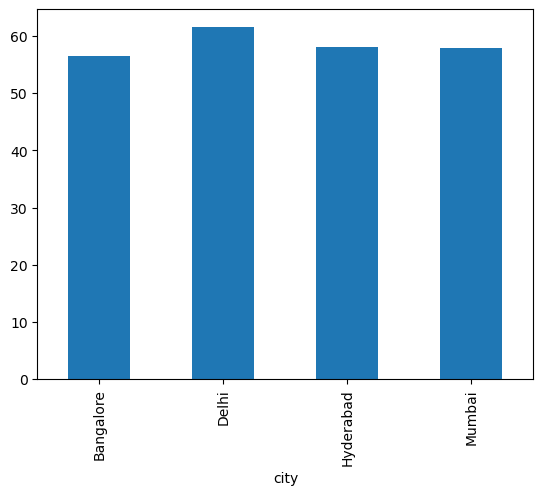

In [40]:
df.groupby("city")["occupancy"].mean().plot(kind="bar")

when was the occupancy better weekdays or weekend?

In [42]:
df_date =pd.read_csv("/Users/shazia/Downloads/source-code-3/3_project_hospitality_analysis/datasets/dim_date.csv")
df_date 

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday
...,...,...,...,...
87,27-Jul-22,Jul 22,W 31,weekeday
88,28-Jul-22,Jul 22,W 31,weekeday
89,29-Jul-22,Jul 22,W 31,weekeday
90,30-Jul-22,Jul 22,W 31,weekend


In [43]:
df = pd.merge(df,df_date,left_on = "check_in_date", right_on ="date")
df

,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity,occupancy,room_class,date,mmm yy,week no,day_type
0,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT1,10,19.0,52.63,Standard,10-May-22,May 22,W 20,weekeday
1,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT2,12,22.0,54.55,Elite,10-May-22,May 22,W 20,weekeday
2,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT3,4,8.0,50.00,Premium,10-May-22,May 22,W 20,weekeday
3,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT4,2,3.0,66.67,Presidential,10-May-22,May 22,W 20,weekeday
4,16559,Atliq Exotica,Luxury,Mumbai,10-May-22,RT1,18,30.0,60.00,Standard,10-May-22,May 22,W 20,weekeday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,19563,Atliq Palace,Business,Bangalore,31-Jul-22,RT4,3,6.0,50.00,Presidential,31-Jul-22,Jul 22,W 32,weekend
6496,17564,Atliq Seasons,Business,Mumbai,31-Jul-22,RT1,8,16.0,50.00,Standard,31-Jul-22,Jul 22,W 32,weekend
6497,17564,Atliq Seasons,Business,Mumbai,31-Jul-22,RT2,19,40.0,47.50,Elite,31-Jul-22,Jul 22,W 32,weekend
6498,17564,Atliq Seasons,Business,Mumbai,31-Jul-22,RT3,11,24.0,45.83,Premium,31-Jul-22,Jul 22,W 32,weekend


In [48]:
df.groupby('day_type')['occupancy'].mean()

day_type
weekeday    50.903780
weekend     72.393432
Name: occupancy, dtype: float64

occupancy in the month of june

In [56]:
df_june_22 = df[df['mmm yy']=='Jun 22']
df_june_22 

,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity,occupancy,room_class,date,mmm yy,week no,day_type
2200,16558,Atliq Grands,Luxury,Delhi,10-Jun-22,RT1,11,19.0,57.89,Standard,10-Jun-22,Jun 22,W 24,weekeday
2201,16558,Atliq Grands,Luxury,Delhi,10-Jun-22,RT2,16,22.0,72.73,Elite,10-Jun-22,Jun 22,W 24,weekeday
2202,16558,Atliq Grands,Luxury,Delhi,10-Jun-22,RT3,6,8.0,75.00,Premium,10-Jun-22,Jun 22,W 24,weekeday
2203,16558,Atliq Grands,Luxury,Delhi,10-Jun-22,RT4,3,3.0,100.00,Presidential,10-Jun-22,Jun 22,W 24,weekeday
2204,16559,Atliq Exotica,Luxury,Mumbai,10-Jun-22,RT1,20,30.0,66.67,Standard,10-Jun-22,Jun 22,W 24,weekeday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295,19563,Atliq Palace,Business,Bangalore,30-Jun-22,RT4,3,6.0,50.00,Presidential,30-Jun-22,Jun 22,W 27,weekeday
4296,17564,Atliq Seasons,Business,Mumbai,30-Jun-22,RT1,6,16.0,37.50,Standard,30-Jun-22,Jun 22,W 27,weekeday
4297,17564,Atliq Seasons,Business,Mumbai,30-Jun-22,RT2,18,40.0,45.00,Elite,30-Jun-22,Jun 22,W 27,weekeday
4298,17564,Atliq Seasons,Business,Mumbai,30-Jun-22,RT3,10,24.0,41.67,Premium,30-Jun-22,Jun 22,W 27,weekeday
